# Node2ToVec requirments

- choco install visualcpp-build-tools
- pip install --upgrade pip setuptools wheel
- pip install --upgrade gensim
- pip install scipy==1.12


In [3]:
pip install --upgrade pip setuptools wheel

# HTTPS://ONA-BOOK.ORG
#Handbook of Graphs and Networks in People Analytics: With Examples in R and Python


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade gensim


  Using cached gensim-4.3.2.tar.gz (23.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached scipy-1.14.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached smart_open-7.0.4-py3-none-any.whl.metadata (23 kB)
  Using cached wrapt-1.16.0-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
Using cached scipy-1.14.0-cp312-cp312-win_amd64.whl (44.5 MB)
Using cached smart_open-7.0.4-py3-none-any.whl (61 kB)
Using cached wrapt-1.16.0-cp312-cp312-win_amd64.whl (37 kB)
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-win_amd64.whl size=23929533 sha256=d0d6776c2765e579e28c69cee65622086a55c94cac41bc596fdef6bc827a9cd1
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\50\c0\ac\7b

In [2]:
pip install scipy==1.12

  Using cached scipy-1.12.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.12.0-cp312-cp312-win_amd64.whl (45.8 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install pandas pyarrow networkx matplotlib  


Note: you may need to restart the kernel to use updated packages.


# Read the GRAPH

Previously , the graph had been exported to graph.graphml to be exported to Gephi. Now, for this noteboot, the graph is loaded from this file.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.read_graphml("graph.graphml")

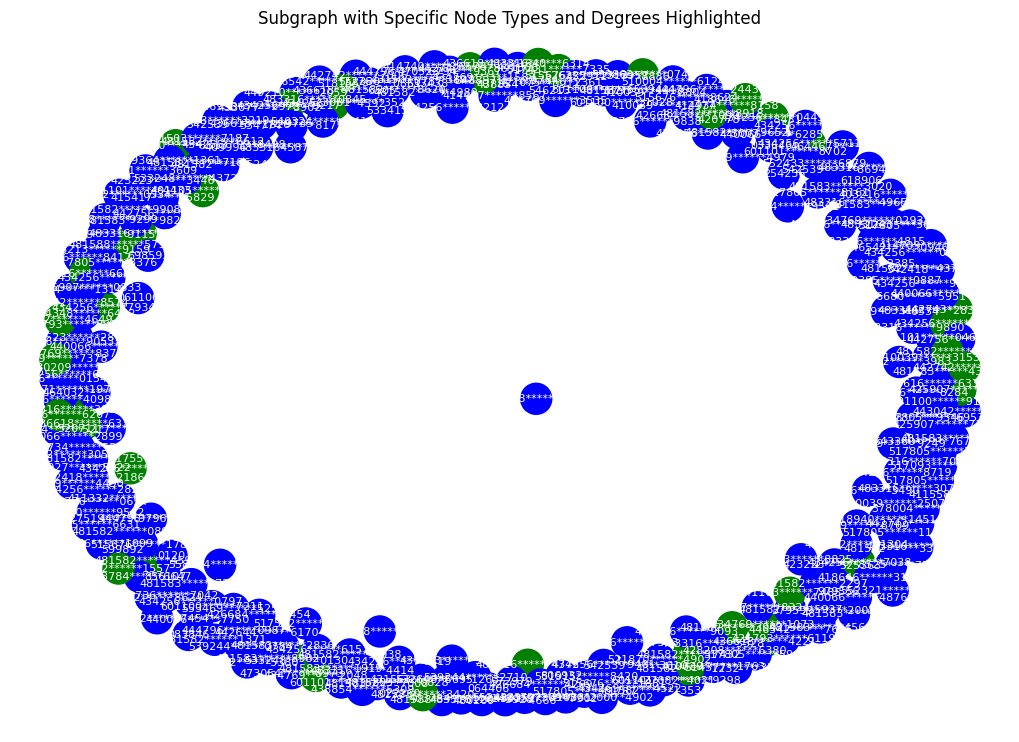

In [2]:

def get_max_degree_by_node_type(G):
    max_degrees = {}
    attributes_by_type = {}
    for node in G.nodes:
        node_type = G.nodes[node].get('Node_Type')
        degree = G.degree[node]
        if node_type:
            if node_type not in max_degrees or degree > max_degrees[node_type]:
                max_degrees[node_type] = degree
                attributes_by_type[node_type] = {
                    'node': node,
                    'degree': degree}
    return max_degrees, attributes_by_type

# Get the max degrees
max_degrees_by_type,attributes_by_type  = get_max_degree_by_node_type(G)
subgraph = G.subgraph(list(G.nodes)[:300])  
# Draw the subgraph with a layout
pos = nx.spring_layout(subgraph)

# Draw nodes
node_colors = []
for node in subgraph.nodes:
    if G.nodes[node]['Node_Type'] == 'Customer' and G.degree[node] == max_degrees_by_type['Customer']:
        node_colors.append('green')  # Highlight Customer nodes with degree 2 in green
    elif G.nodes[node]['Node_Type'] == 'Transaction_Type' and G.degree[node] == max_degrees_by_type['Transaction_Type']:
        node_colors.append('red')  # Highlight Transaction nodes with max degree in red
    else:
        node_colors.append('blue')

# Draw the subgraph
plt.figure(figsize=(10, 7))
nx.draw(subgraph, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=8, font_color='white')
plt.title('Subgraph with Specific Node Types and Degrees Highlighted')
plt.show()

In [16]:
pip install node2vec

Note: you may need to restart the kernel to use updated packages.


# Node Embeddings

In [3]:
from node2vec import Node2Vec

# Create a Node2Vec model
# explain the parameters
# dimensions: Dimensionality of the node2vec embeddings
# walk_length: Length of the random walk
# num_walks: Number of random walks to generate
# workers: Number of parallel processes

node2vec = Node2Vec(G, dimensions=2, walk_length=5, num_walks=10, workers=1)  # dimensions=2 for 2D visualization

# Fit the model 
# Explain the parameters
# window: Maximum distance between the current and predicted word within a sentence
# min_count: Ignores all words with total frequency lower than this
# batch_words: Target size (in words) for batches of examples passed to worker threads

model = node2vec.fit(window=10, min_count=1, batch_words=4)

embeddings = model.wv

#Save embeddings to file
model.wv.save("node2vec_embeddings.kv")



c:\Users\HP\OneDrive\Documents\Eduardo Toledo\ASAI\graph_customer_segmentation\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating walks (CPU: 1): 100%|██████████| 10/10 [10:02:09<00:00, 3612.92s/it]


Node2Vec performs random walks on the graph to generate sequences of nodes, analogous to sentences in text. These sequences capture both local and global structure of the graph.

Nodes as Words: In these sequences, each node is treated like a word in a sentence. Hence, Word2Vec emerges to get the embeddings.

Initially, Node2Vec only considers the graph's topology:

Nodes: Each node is represented by its position and relationships within the graph.
Edges: Represent the connections between nodes without any additional features.

Word2Vec is a shallow, two-layer neural network that is trained to reconstruct linguistic contexts of words. The objective of the word2vec model is to produce word representation (vectors) given a text corpus.

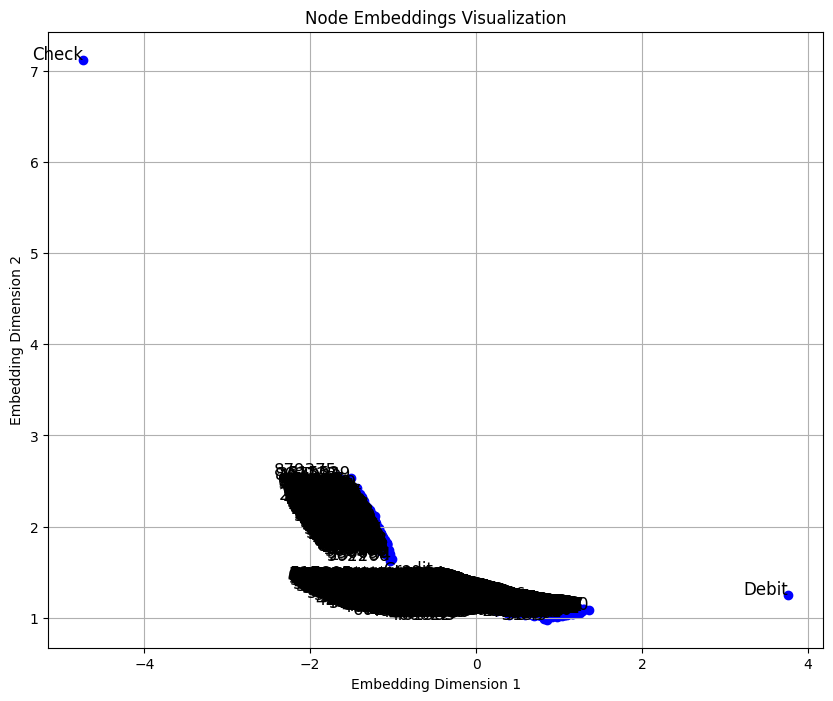

In [4]:
from gensim.models import KeyedVectors
import numpy as np
# Load embeddings from file
embeddings = KeyedVectors.load("node2vec_embeddings.kv")

# Print embeddings for each node
#for node in G.nodes:
#    print(f"Node {node}: {embeddings[str(node)]}")
    
# Extract the embeddings in the required format
node_ids = list(embeddings.index_to_key)
node_embeddings = np.array([embeddings[node] for node in node_ids])

# Plot the embeddings
plt.figure(figsize=(10, 8))
for i, node in enumerate(node_ids):
    plt.scatter(node_embeddings[i, 0], node_embeddings[i, 1], color='blue')
    plt.text(node_embeddings[i, 0], node_embeddings[i, 1], s=node, fontsize=12, ha='right')

plt.title("Node Embeddings Visualization")
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")
plt.grid(True)
plt.show()


# Node Embedding Interpretation
 The dense cluster of nodes suggests a big group of nodes that are closely related in terms of their embeddings. These nodes might be part of a community or share common features/attributes within the graph. These nodes are conmnected to customer nodes.
 On the another hand, There are other nodes of Transaction Type that are positioned far from the dense cluster.The nodes labeled "Check", "Credit" ande "Debit"   have unique features or a unique position within the graph that make s it very different from other nodes. These nodes have structural Differences because are  highly connected nodes (hubs) or isolated nodes.Also,  these nodes  play special roles within the graph (e.g., central nodes in different subgraphs or possessing unique attributes).

# Clustering for market segmention

Given that nod2vec represents only the topology of the graph excluding the node features and the egde features, then, One option is to use these embeddings plus node features and apply some method of clustering. However, for muy case, the node features are only node_type and the most crucial imformation underneaths on edged features. Hence, I will use other method for getting embeding based on geometric pytorch. 
https://pytorch-geometric.readthedocs.io/en/latest/